<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Classification/Digit_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt #plotting library (lets us draw graphs)
%matplotlib inline

from sklearn import datasets #the datasets from sklearn


digits = datasets.load_digits() #load the digits into the variable 'digits'

In [2]:
digits.data.shape

(1797, 64)

In [3]:
digits.data[35,:]

array([ 0.,  3., 15.,  8.,  8.,  6.,  0.,  0.,  0.,  4., 16., 16., 16.,
       13.,  2.,  0.,  0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  2.,
       16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  7.,  6., 12.,  9.,  0.,
        0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  5., 14.,
       15.,  2.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.])

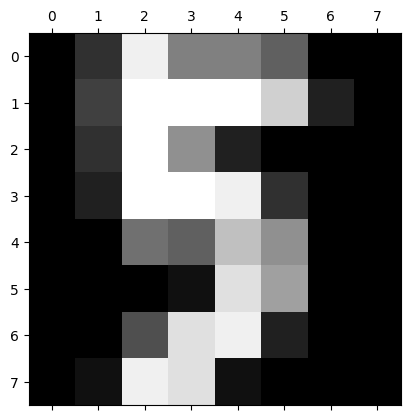

In [4]:
#code to reshape the 64 numbers into an 8x8 matrix and then draw it
plt.matshow(digits.data[35,:].reshape(8,8),cmap='gray')

In [5]:
digits.target[35]

5

(array([29.,  3.,  4.,  3.,  1.,  1.,  2.,  1.,  2.,  3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

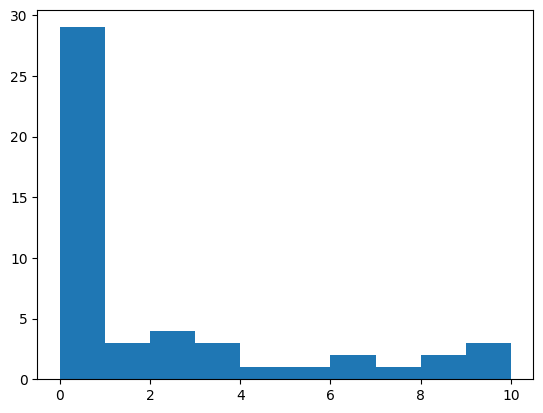

In [7]:
plt.hist(digits.data[35,:],bins=range(11))

In [8]:
training_data = digits.data[0:-10,:] #this means all but the last 10 rows should be put in training_data
training_target = digits.target[0:-10] #this puts all but the last 10 elements of the labels (targets) into training_target

#similarly this takes the last digit and puts that in test_data and test_target
test_data = digits.data[-10:,:]
test_target = digits.target[-10:]

In [9]:
from sklearn import neighbors #import the library that we need
nn = neighbors.KNeighborsClassifier(n_neighbors=1) #this is our model (with just one nearest neighbour)
nn.fit(training_data,training_target); #fit our model to the training data

In [10]:
nn.predict(test_data)

array([5, 4, 8, 1, 4, 9, 0, 8, 9, 8])

In [11]:
test_target

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

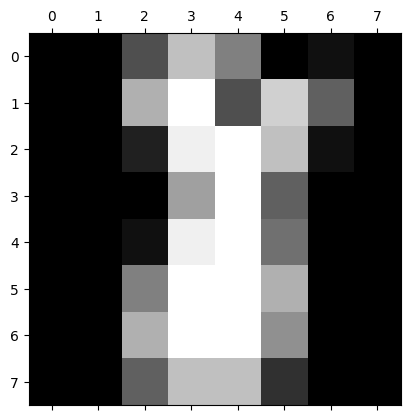

In [12]:
plt.matshow(test_data[3].reshape(8,8),cmap='gray')

In [17]:
import numpy as np

#classification libraries
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

from sklearn.model_selection import KFold

#prepare k-fold cross validation
kf = KFold(n_splits=5)

#variables to count up how many we got right
tally_correct = 0
tally_total = 0
for train_index, test_index in kf.split(digits.data):
    #here we split the dataset up into training and test sets, these change each iteration
    training_data = digits.data[train_index,:] 
    training_target = digits.target[train_index] 
    test_data = digits.data[test_index,:]
    test_target = digits.target[test_index]
    
    # Uncomment one of these classifiers to see how it does
    #csf = tree.DecisionTreeClassifier()
    #csf = ensemble.RandomForestClassifier(n_estimators=50, min_samples_split=1, max_depth=None, max_features=16)
    #csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1, max_depth=None, max_features=8)
    csf = neighbors.KNeighborsClassifier(n_neighbors=1)
    #csf= svm.LinearSVC(C=0.05) #Linear Support Vector Machine classifier
    #csf = naive_bayes.GaussianNB()
    
    csf.fit(training_data,training_target)
    
    predictions = csf.predict(test_data)
    number_correct = np.sum(predictions==test_target)
    total_number = len(predictions)
    print("%d of %d correct" % (number_correct,total_number))
    tally_correct += number_correct
    tally_total += total_number
print (" ")
print ("Total: %d of %d correct (%0.2f%%)" % (tally_correct, tally_total, 100.0*tally_correct/tally_total))

346 of 360 correct
343 of 360 correct
347 of 359 correct
355 of 359 correct
343 of 359 correct
 
Total: 1734 of 1797 correct (96.49%)
